In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import pickle, os


In [2]:
import holoviews as hv
hv.notebook_extension()

In [3]:
# SUPER SLOOOOOW ~ 10-20 minutes to load
# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta") # 

In [4]:
BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

In [5]:
# tables = hv.HoloMap(kdims=['wave'])
# for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

#     vdims = BES_Panel["generalElectionVote"+ wave].cat.categories
#     crosstab = pd.crosstab(index   = BES_Panel["generalElectionVote"+wave],
#                      columns = BES_Panel["wave" + wave.replace("W","")],
#                      values  = BES_Panel["wt_full_"+wave],
#                      aggfunc = sum,
#                      normalize=True)    

#     tables[wave] = hv.ItemTable( zip( vdims, tuple(crosstab[1.0][vdims].values) ) )
    
# tables

In [6]:
# get full list of *all* generalElectionVote options
x_axis = "generalElectionVote"
cats = []
for wave in [1,2,3,4,5,6,8,10]:
    wave_str = "W"+str(wave)

    cats.extend(list(BES_Panel[x_axis + wave_str].cat.categories))
    
all_generalElectionVote_options = list(set(cats))

In [7]:
# decide order of categories by pre-calculating average
ct_accum = []
first_wave = True
for wave in [1,2,3,4,5,6,8,10]:
    wave_str = "W"+str(wave)
    BES_Panel[x_axis+wave_str].cat.set_categories(all_generalElectionVote_options, inplace=True)

    crosstab = pd.crosstab(index   = BES_Panel[ x_axis + wave_str ],
                           columns = BES_Panel[ "wave" + str(wave) ],
                           values  = BES_Panel[ "wt_full_" + wave_str ],
                           aggfunc = sum,
                           normalize=True)
    
    if first_wave:
        ct_accum = crosstab[1.0]
        first_wave = False
    else:
        ct_accum += crosstab[1.0]
parties_sorted_by_average_vote = list(ct_accum.sort_values(ascending=False).index)

:Layout
   .HoloMap.I  :HoloMap   [wave]
      :Table   [generalElectionVote]   (voteshare)
   .HoloMap.II :HoloMap   [wave]
      :Bars   [generalElectionVote]   (voteshare)
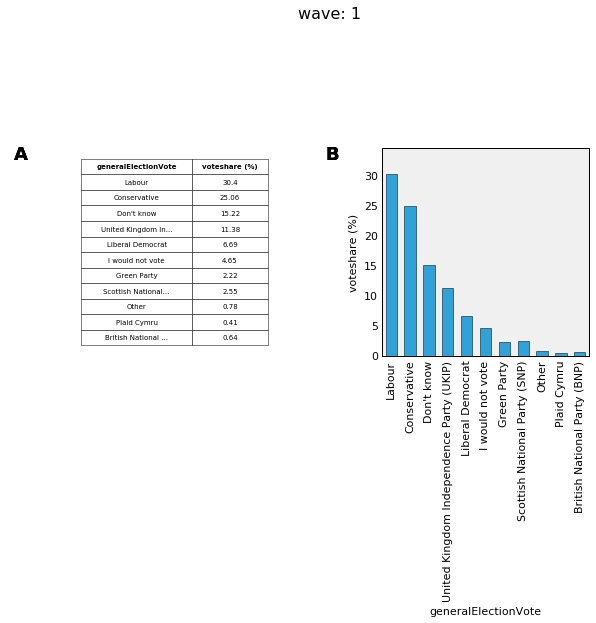
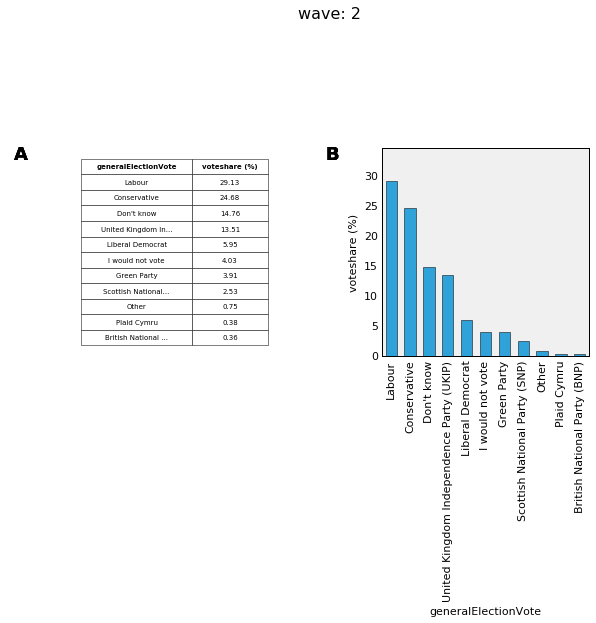
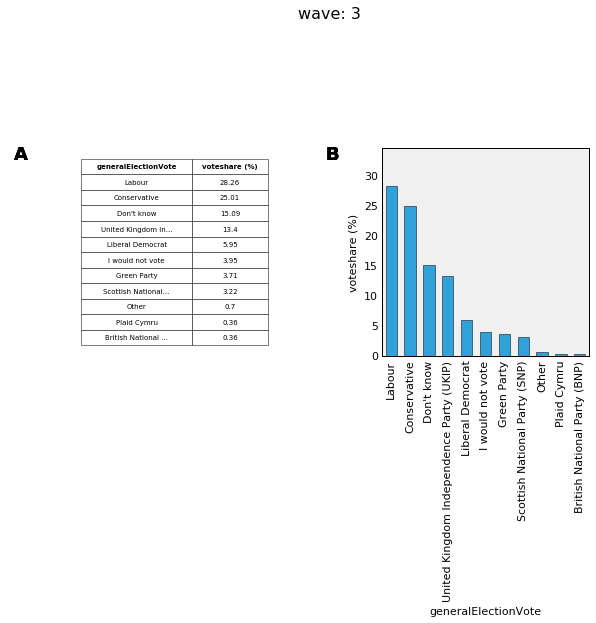
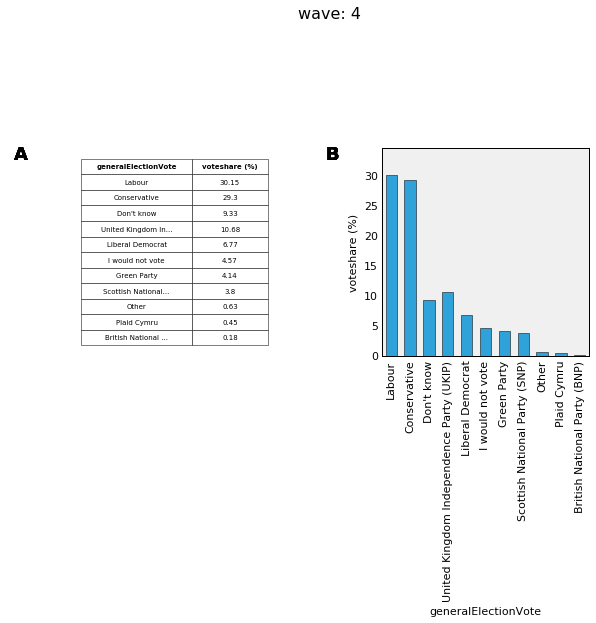
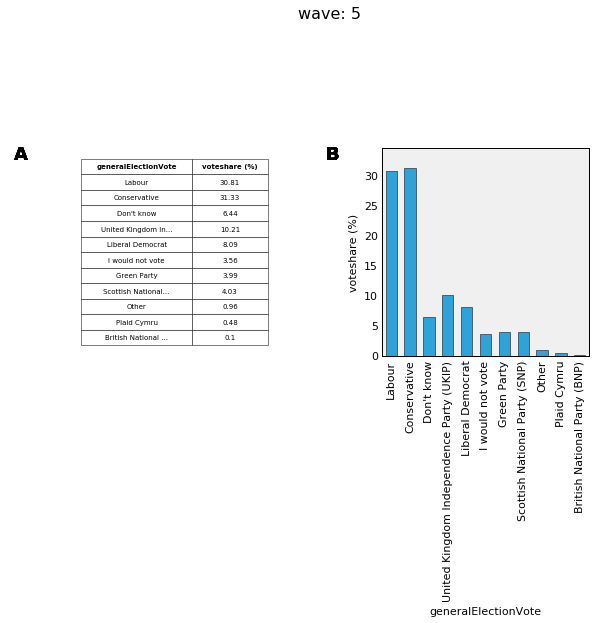
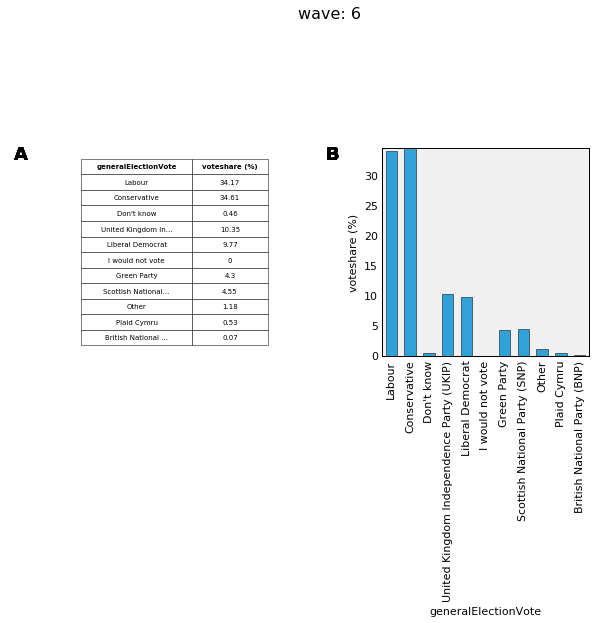
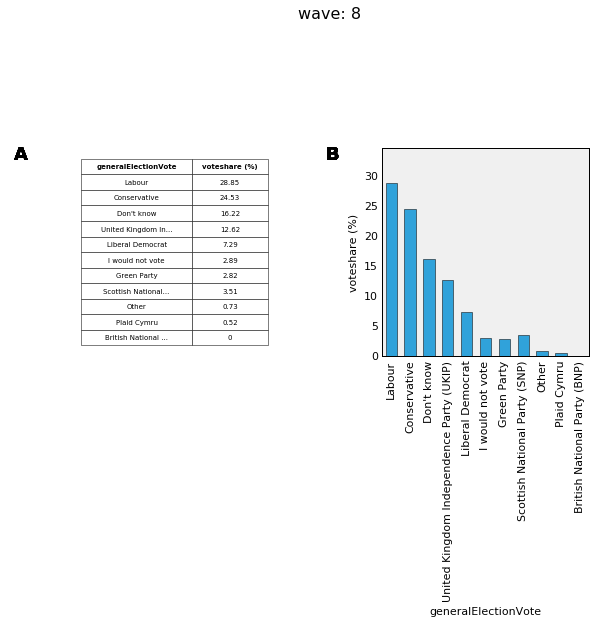
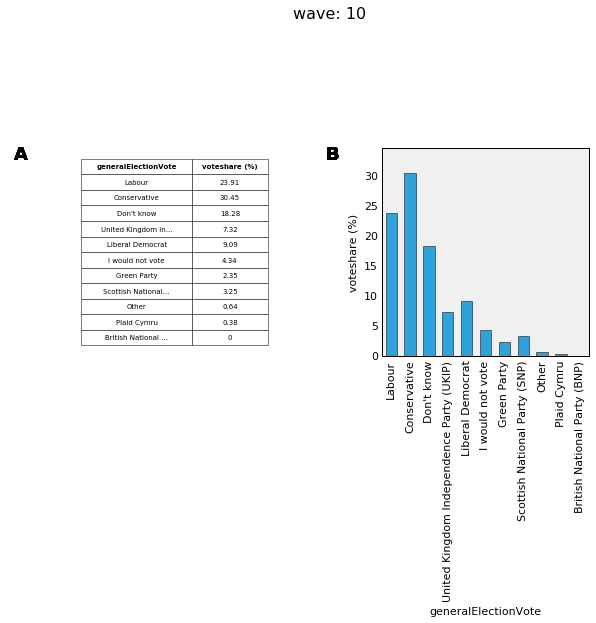

In [8]:
tables = hv.HoloMap(kdims=['wave'])
bars   = hv.HoloMap(kdims=['wave'])

x_axis = "generalElectionVote"
y_axis = "voteshare"

x_dim = hv.Dimension(x_axis,values = parties_sorted_by_average_vote)
y_dim = hv.Dimension(y_axis,unit = '%')

for wave in [1,2,3,4,5,6,8,10]:
    wave_str = "W"+str(wave)
    # make sure every generalElectionVote has the same set of categories
    # or holoviews will crash with a *really* unhelpful error message
    BES_Panel[x_axis+wave_str].cat.reorder_categories(parties_sorted_by_average_vote, inplace=True)

    crosstab = pd.crosstab(index   = BES_Panel[ x_axis + wave_str ],
                           columns = BES_Panel[ "wave" + str(wave) ],
                           values  = BES_Panel[ "wt_full_" + wave_str ],
                           aggfunc = sum,
                           normalize=True)
    
    # change to %, round to 2 decimal places
    ct = pd.DataFrame([  crosstab.index,
                        (crosstab[1.0]*100).round(decimals=2) ]).T
    ct.columns=[x_axis,y_axis]
    
    tables[wave] = hv.Table( ct, kdims=[x_dim], vdims =[y_dim] )
    bars[wave]   = hv.Bars(  ct, kdims=[x_dim], vdims =[y_dim] )   

# rotate labels so they don't overlap
%opts Bars [xrotation=90]

tables + bars

In [9]:
# for development, lets pare down the BES_Panel dataset to just the columns we're working with now
cols = []
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:
    cols.append( "generalElectionVote"+wave )
    cols.append( "wave" + wave.replace("W","") )
    cols.append( "wt_full_"+wave )
    
BES_Panel[cols].to_pickle("BES_gEV_wave_weights.pkl")

# read back in later with this
# BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

In [10]:
BES_Panel.dtypes

generalElectionVoteW1     category
wave1                      float64
wt_full_W1                 float64
generalElectionVoteW2     category
wave2                      float64
wt_full_W2                 float64
generalElectionVoteW3     category
wave3                      float64
wt_full_W3                 float64
generalElectionVoteW4     category
wave4                      float64
wt_full_W4                 float64
generalElectionVoteW5     category
wave5                      float64
wt_full_W5                 float64
generalElectionVoteW6     category
wave6                      float64
wt_full_W6                 float64
generalElectionVoteW8     category
wave8                      float64
wt_full_W8                 float64
generalElectionVoteW10    category
wave10                     float64
wt_full_W10                float64
dtype: object

In [11]:
# how to get the list of categories for a category dtype (order matters here for indexing!)
BES_Panel.generalElectionVoteW1.cat.categories

Index(['Labour', 'Conservative', 'Don't know',
       'United Kingdom Independence Party (UKIP)', 'Liberal Democrat',
       'I would not vote', 'Green Party', 'Scottish National Party (SNP)',
       'Other', 'Plaid Cymru', 'British National Party (BNP)'],
      dtype='object')

In [12]:
# how to turn category dtype into integer (index to the category list above) type
BES_Panel.generalElectionVoteW1.cat.codes

0        0
1        1
2        0
3        1
4        1
5        0
6        3
7        3
8        0
9        1
10       1
11       3
12       1
13       1
14      -1
15       6
16       1
17       7
18       0
19       3
20       1
21       4
22       3
23       2
24       3
25       5
26       3
27       4
28       3
29       1
        ..
64659   -1
64660   -1
64661   -1
64662   -1
64663   -1
64664   -1
64665   -1
64666   -1
64667   -1
64668   -1
64669   -1
64670   -1
64671   -1
64672   -1
64673   -1
64674   -1
64675   -1
64676   -1
64677   -1
64678   -1
64679   -1
64680   -1
64681   -1
64682   -1
64683   -1
64684   -1
64685   -1
64686   -1
64687   -1
64688   -1
dtype: int8

In [13]:
# how to turn a column of <some dtype> into category dtype
BES_Panel.generalElectionVoteW1.cat.codes.astype('category')

0        0
1        1
2        0
3        1
4        1
5        0
6        3
7        3
8        0
9        1
10       1
11       3
12       1
13       1
14      -1
15       6
16       1
17       7
18       0
19       3
20       1
21       4
22       3
23       2
24       3
25       5
26       3
27       4
28       3
29       1
        ..
64659   -1
64660   -1
64661   -1
64662   -1
64663   -1
64664   -1
64665   -1
64666   -1
64667   -1
64668   -1
64669   -1
64670   -1
64671   -1
64672   -1
64673   -1
64674   -1
64675   -1
64676   -1
64677   -1
64678   -1
64679   -1
64680   -1
64681   -1
64682   -1
64683   -1
64684   -1
64685   -1
64686   -1
64687   -1
64688   -1
dtype: category
Categories (12, int64): [-1, 0, 1, 2, ..., 7, 8, 9, 10]